
****1)problem statement:****


The goal of this project is to predict customer churn for a telecom company using the Telco Customer Churn dataset from Kaggle. By analyzing customer demographics, services signed up for, and billing information, we aim to build a classification model that can identify customers at risk of leaving the company. This can help the business implement targeted retention strategies and reduce churn rates.


* Given a dataset containing information about a telecom company's customers: including demographics (gender, age....), account details (contract type, tenure....), and services used (internet service, phone lines...)
*  Build a machine learning model to predict whether a customer is likely to churn (stop using the service) or stay, based on their features.


****2)Data collection:****
The dataset is part of a customer analytics project for a telecommunications company.

It contains detailed information about customer demographics, services signed up for, billing, and contractual data, with the goal of predicting customer churn (whether a customer will leave the service).

📄 Dataset name: WA_Fn-UseC_-Telco-Customer-Churn.csv

📊 Rows: 7,043

📈 Columns: 21

🔗 Source: [IBM Sample Data on Kaggle](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

****2.1 Import Data and Required Packages:****

Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [70]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")



Import the CSV Data as Pandas DataFrame



In [71]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [72]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [73]:
df.shape

(7043, 21)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [75]:
df.iloc[0]

customerID                7590-VHVEG
gender                        Female
SeniorCitizen                      0
Partner                          Yes
Dependents                        No
tenure                             1
PhoneService                      No
MultipleLines       No phone service
InternetService                  DSL
OnlineSecurity                    No
OnlineBackup                     Yes
DeviceProtection                  No
TechSupport                       No
StreamingTV                       No
StreamingMovies                   No
Contract              Month-to-month
PaperlessBilling                 Yes
PaymentMethod       Electronic check
MonthlyCharges                 29.85
TotalCharges                   29.85
Churn                             No
Name: 0, dtype: object

In [76]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [77]:
df.describe(include='object').T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


****Exploring the data****


In [78]:
print("Valeurs nulles détectées avant:")
print(df.isnull().sum()[df.isnull().sum() > 0])

print("\nNombre de lignes où TotalCharges est vide (' ') :")
print((df['TotalCharges'] == ' ').sum())

df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)

df['TotalCharges'] = df['TotalCharges'].astype(float)

print("\nValeurs manquantes après:")
print(df.isnull().sum()[df.isnull().sum() > 0])
df.dropna(inplace=True)

print("\nDonnées après:")
print(df.isnull().sum().sum(), "valeurs manquantes restantes")


Valeurs nulles détectées avant:
Series([], dtype: int64)

Nombre de lignes où TotalCharges est vide (' ') :
11

Valeurs manquantes après:
TotalCharges    11
dtype: int64

Données après:
0 valeurs manquantes restantes


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [80]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
binary_features = [feature for feature in df.columns if df[feature].nunique() == 2]
continuous_features = [feature for feature in df.columns if df[feature].nunique() > 2]
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('We have {} continuous features : {}'.format(len(continuous_features), continuous_features))
print('We have {} binary features: {}'.format(len(binary_features), binary_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 4 numerical features : ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
We have 14 continuous features : ['customerID', 'tenure', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']
We have 7 binary features: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

We have 17 categorical features : ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [81]:
def display_category_distribution(df, categorical_features):
    for col in categorical_features:
        print(f"  {col.upper()} ({df[col].nunique()} unique values)")
        print("-" * 50)
        counts = df[col].value_counts()
        total = len(df[col])
        for val, count in counts.items():
            percent = 100 * count / total
            print(f"  • {val:<15} →  {count} records ({percent:.1f}%)")
        print()  
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()
cat_cols = [col for col in cat_cols if col not in ['customerID']] 
display_category_distribution(df, cat_cols)


  GENDER (2 unique values)
--------------------------------------------------
  • Male            →  3549 records (50.5%)
  • Female          →  3483 records (49.5%)

  PARTNER (2 unique values)
--------------------------------------------------
  • No              →  3639 records (51.7%)
  • Yes             →  3393 records (48.3%)

  DEPENDENTS (2 unique values)
--------------------------------------------------
  • No              →  4933 records (70.2%)
  • Yes             →  2099 records (29.8%)

  PHONESERVICE (2 unique values)
--------------------------------------------------
  • Yes             →  6352 records (90.3%)
  • No              →  680 records (9.7%)

  MULTIPLELINES (3 unique values)
--------------------------------------------------
  • No              →  3385 records (48.1%)
  • Yes             →  2967 records (42.2%)
  • No phone service →  680 records (9.7%)

  INTERNETSERVICE (3 unique values)
--------------------------------------------------
  • Fiber optic    

****insights:****

1.Le genre ne semble pas être un facteur différenciant initialement

2.La majorité des clients sont indépendants, ce qui peut indiquer une population plus jeune ou sans enfant. Ces clients peuvent être plus enclins à changer de fournisseur (churn) s’ils trouvent de meilleures offres.

3.Le service téléphonique est une base très courante, ce qui peut faire du cross-selling (ex : Internet, TV, etc.) une stratégie efficace.

4.Près de la moitié des clients ont plusieurs lignes, ce qui peut refléter des foyers ou des usages professionnels. Ces clients sont probablement plus rentables mais peuvent aussi être plus exigeants.


****univariante analysis:****

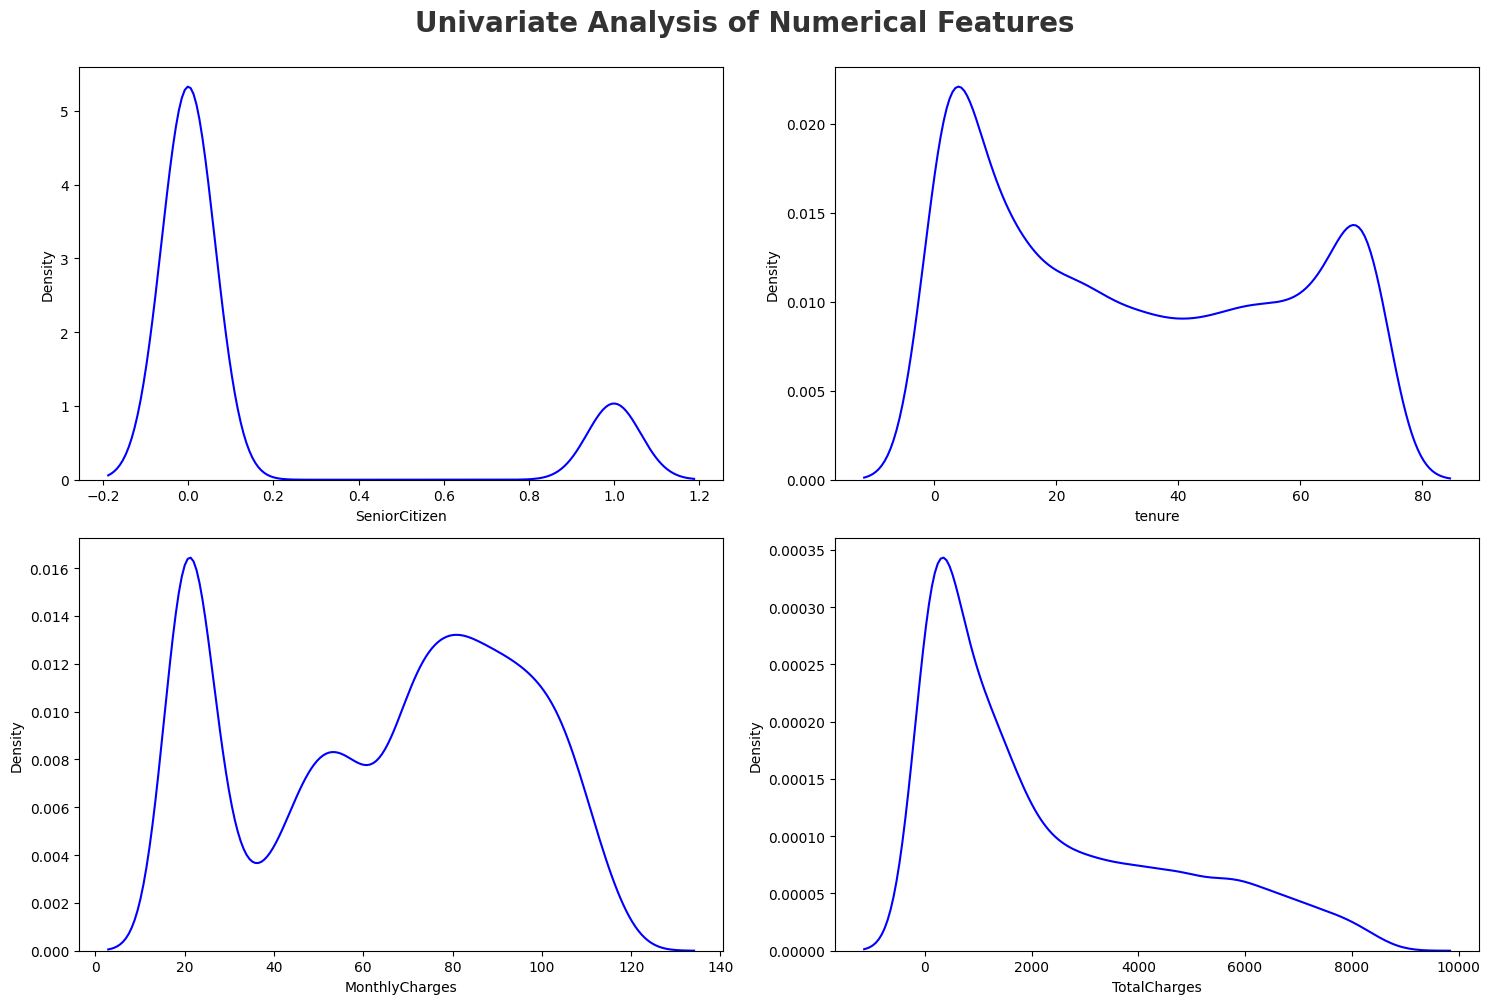

In [82]:
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

****insights:****

TotalCharges:  is a right-skewed distribution, which is expected since it accumulates over time.
The skewness is likely due to many new customers with low total charges and a few long-term customers with high charges.

monthlyCharges:Some or the majority  prefer lower-cost plans, while others are on higher tiers (possibly with bundled services).

tenure:This indicates that many customers either churn early or stay for a long time.

****Categorical Features:****

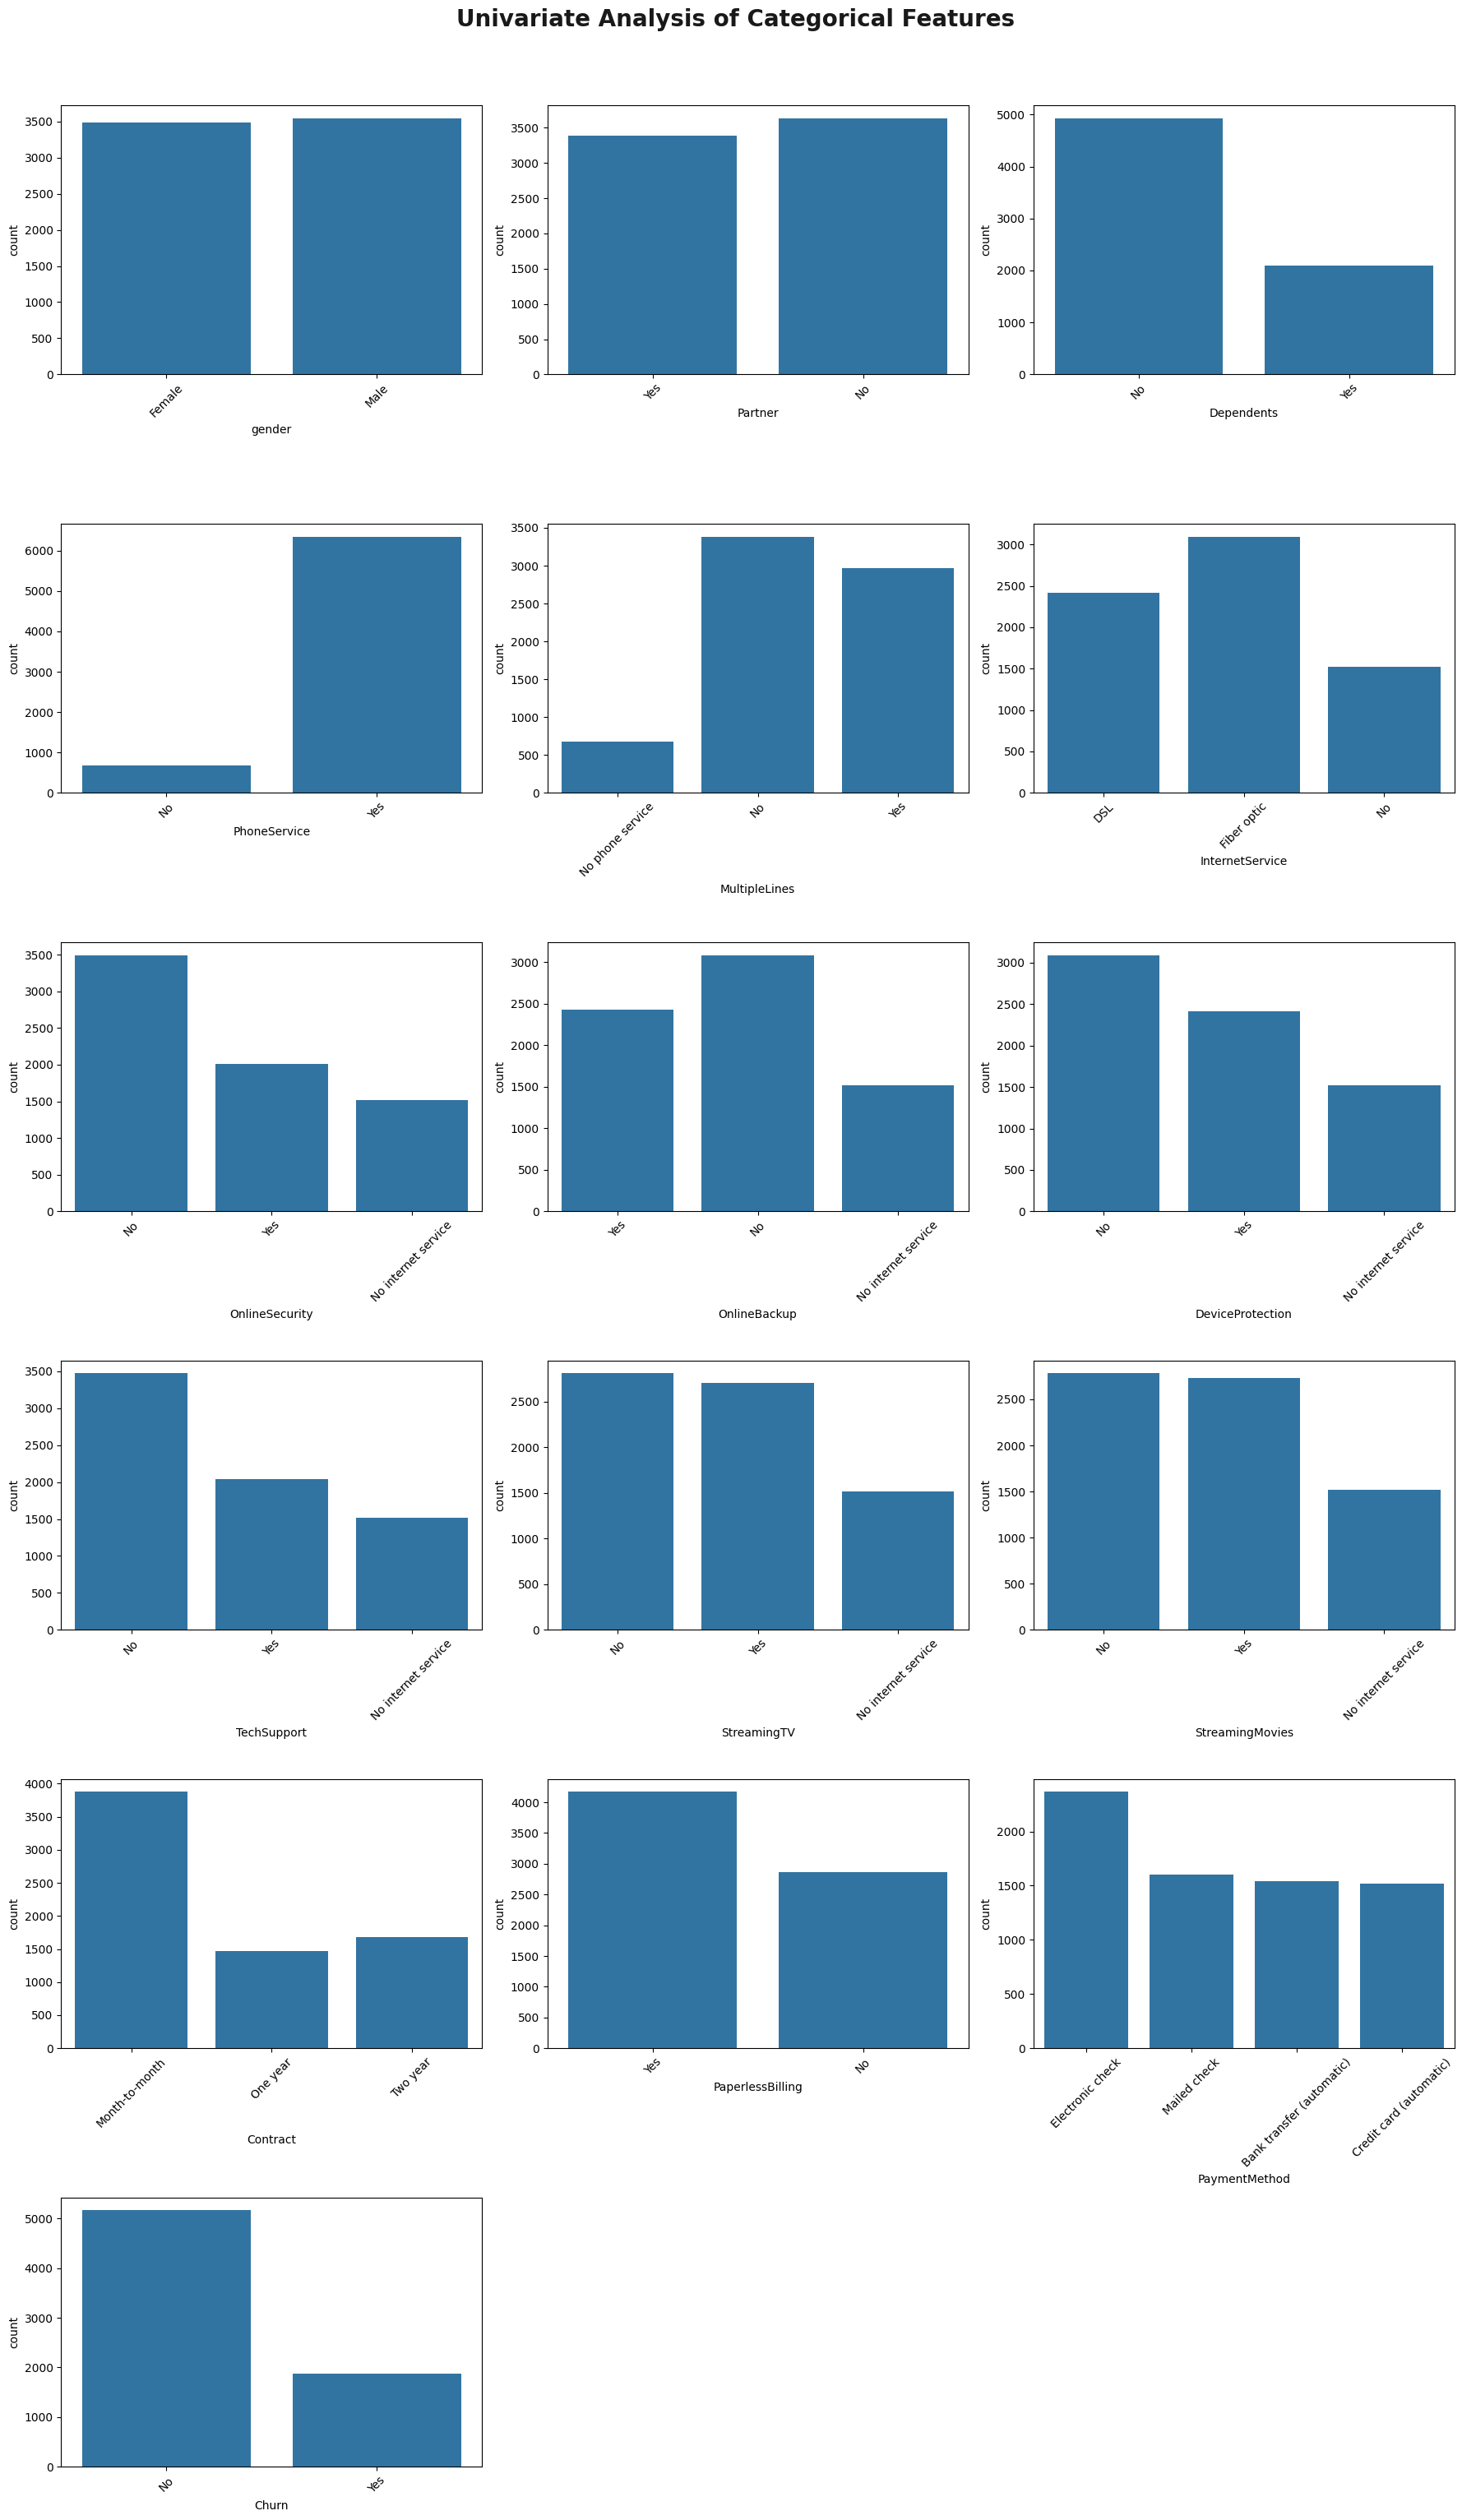

In [83]:
import math

if 'customerID' in categorical_features:
    categorical_features.remove('customerID')

cols = 3
rows = math.ceil(len(categorical_features) / cols)

plt.figure(figsize=(6 * cols, 5 * rows))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.9, y=1.02)

for i in range(len(categorical_features)):
    plt.subplot(rows, cols, i + 1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


****insghits:****

Slightly more customers without a partner and without dependents(independants)

Most customers (90%+) have Phone Service, and among them:

About half have multiple lines.

Customers without phone service are a small minority.

for the internet service fibr optic is dominant

most of them are month to month contract 

More customers prefer paperless billing


In [56]:
discrete_features=[feature for feature in numeric_features if len(df[feature].unique())<=25]

continuous_features=[feature for feature in numeric_features if len(df[feature].unique()) > 25]

print('We have {} discrete features : {}'.format(len(discrete_features), discrete_features))
print('\nWe have {} continuous_features : {}'.format(len(continuous_features), continuous_features))

We have 2 discrete features : ['SeniorCitizen', 'tenure']

We have 1 continuous_features : ['MonthlyCharges']


In [84]:
#Convert No internet service -> No
cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df[cols] = df[cols].replace('No internet service', 'No')
df['MultipleLines']=df['MultipleLines'].replace('No phone service', 'No')
#Senior Citizen convert back to yes no to differentiate
df['SeniorCitizen'] = df['SeniorCitizen'].map({1: 'Yes', 0: 'No'})
df['SeniorCitizen'].value_counts()
df['MultipleLines'].value_counts()

MultipleLines
No     4065
Yes    2967
Name: count, dtype: int64

In [52]:
pd.set_option('display.max_columns', None)
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [85]:
def transf(tenure):
    
    if tenure <=24:
        return '0 - 24 months'
    elif tenure <=36:
        return '24 - 36 months'
    elif tenure <=48:
        return '36 - 48 months'
    elif tenure <=60:
        return '48 - 60 months'
    else:
        return '> 60 months'


In [86]:
df['tenure']=df['tenure'].map(transf)
df['tenure'].value_counts()

tenure
0 - 24 months     3199
> 60 months       1407
24 - 36 months     832
48 - 60 months     832
36 - 48 months     762
Name: count, dtype: int64

In [88]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['Churn'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result


,Column,Hypothesis Result
0,gender,Fail to Reject Null Hypothesis
1,Partner,Reject Null Hypothesis
2,Dependents,Reject Null Hypothesis
3,PhoneService,Fail to Reject Null Hypothesis
4,MultipleLines,Reject Null Hypothesis
5,InternetService,Reject Null Hypothesis
6,OnlineSecurity,Reject Null Hypothesis
7,OnlineBackup,Reject Null Hypothesis
8,DeviceProtection,Reject Null Hypothesis
9,TechSupport,Reject Null Hypothesis


gender and phoneService are not correlated with the target 'Churn'

In [89]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [90]:
continues_features=[feature for feature in numeric_features if len(df[feature].unique())>=10]
print('Num of continues features :',continues_features)

Num of continues features : ['MonthlyCharges', 'TotalCharges']


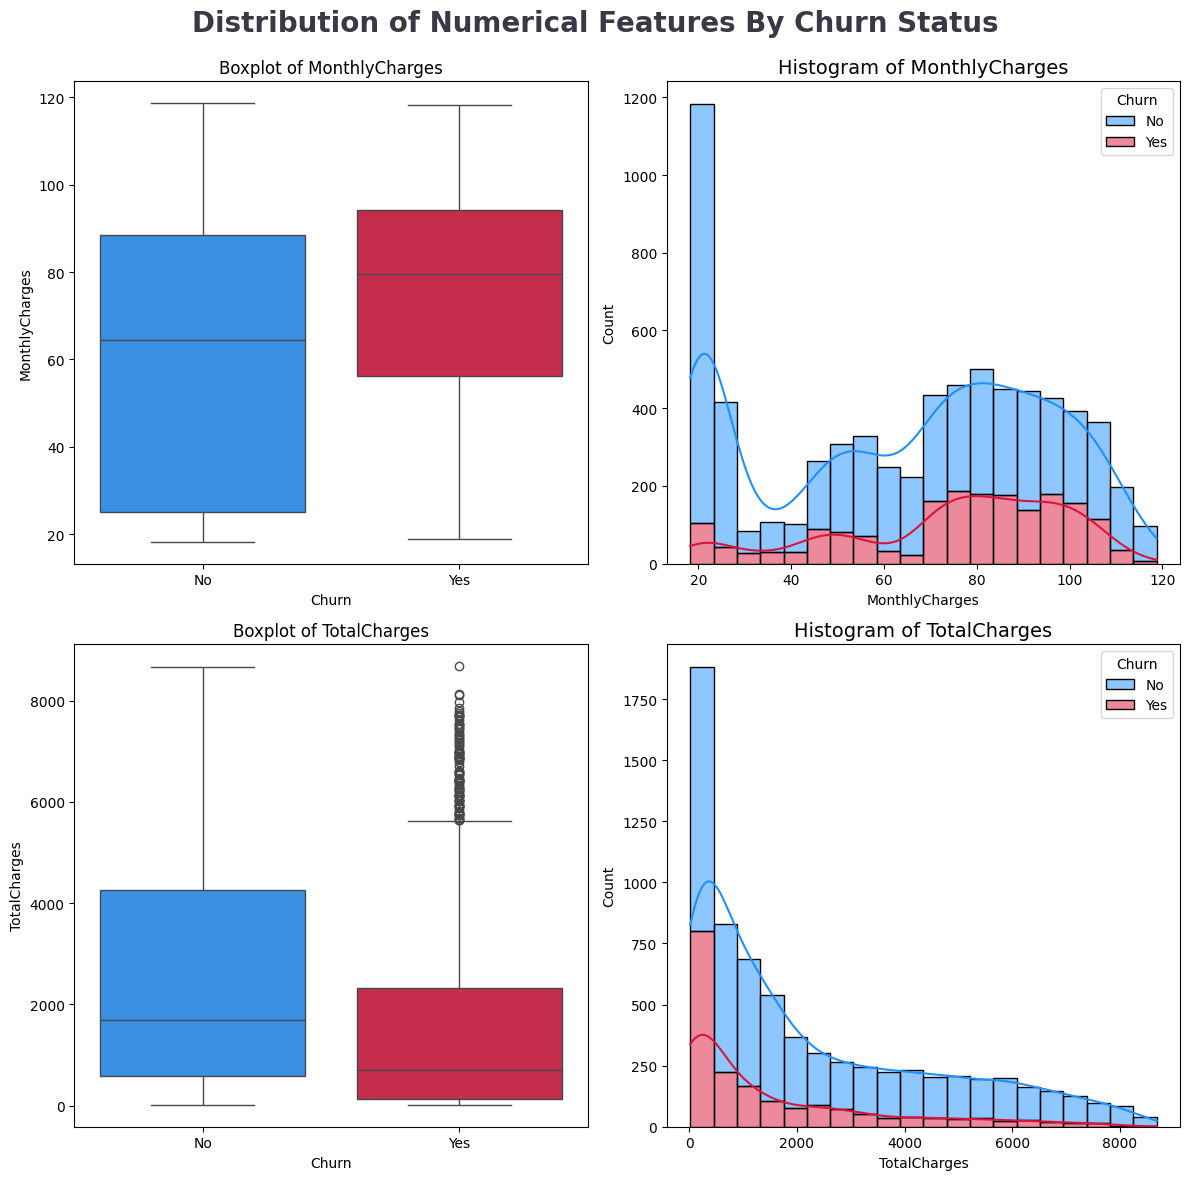

In [ ]:

clr1 = ['#1E90FF', '#DC143C']  
continues_features = ['MonthlyCharges', 'TotalCharges'] 

fig, ax = plt.subplots(2, 2, figsize=(12, 12))
fig.suptitle('Distribution of Numerical Features By Churn Status', color='#3C3744',
             fontsize=20, fontweight='bold', ha='center')

for i, col in enumerate(continues_features):   
    sns.boxplot(data=df, x='Churn', y=col, palette=clr1, ax=ax[i, 0])
    ax[i, 0].set_title(f'Boxplot of {col}', fontsize=12)
    
    sns.histplot(data=df, x=col, hue='Churn', bins=20, kde=True, 
                 multiple='stack', palette=clr1, ax=ax[i, 1])
    ax[i, 1].set_title(f'Histogram of {col}', fontsize=14)

fig.tight_layout()
fig.subplots_adjust(top=0.92)
plt.show()

****1. MonthlyCharges:****

Median MonthlyCharges is higher for churned customers.

The interquartile range (IQR) for churned customers is slightly above that of non-churned customers.

Customers who did not churn are spread across lower and medium monthly charges.

Customers who churned are concentrated more in the higher monthly charges (peaks in the 70–100 USD range).

****2. TotalCharges****

Median TotalCharges is much higher for non-churned customers.

Churned customers have a lower median and narrower spread, with many close to zero.

A large number of outliers exist in the churned group : indicating a few high-paying customers still churn.

A large number of churned customers have very low total charges.

This confirms that churners are often new customers, i.e., they haven’t accumulated much payment history.

Non-churned customers are more evenly distributed across all levels of total charges.

****Analysis report:****

The analysis highlights the importance of:

Monitoring month-to-month customers who are more churn-prone.

Focusing on tenure and total charges as indicators of loyalty.

Segmenting customers by internet type, billing preference, and service tier for targeted retention strategies.

Customers with higher monthly charges are more likely to churn, possibly due to dissatisfaction with cost or value. Customers with lower charges tend to stay longer.

Customers who churn tend to leave early, before accumulating high total charges. Long-term customers (with high total charges) are more loyal and stable.




****4:Visualisation:*****

4.1 vizualise the target( Churn):

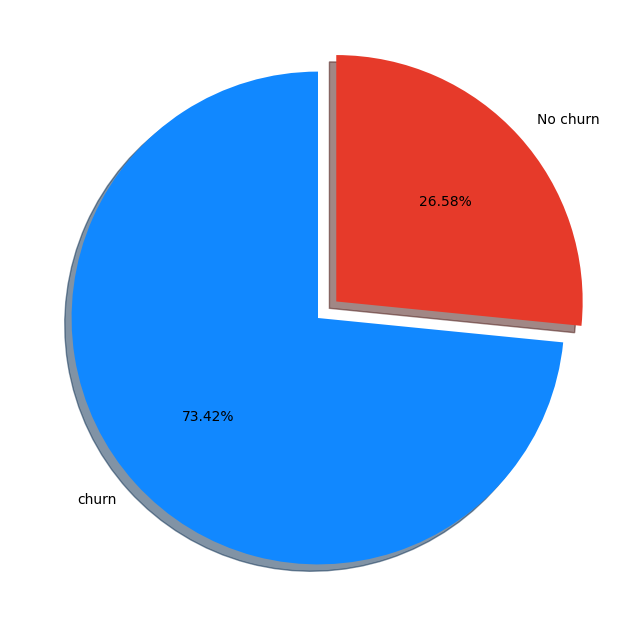

In [ ]:
percentage = df.Churn.value_counts(normalize=True)*100
labels = ["churn","No churn"]

# Plot PieChart with Ploty library
fig, ax = plt.subplots(figsize =(15, 8))
explode = (0, 0.1)
colors = ['#1188ff','#e63a2a']
ax.pie(percentage, labels = labels, startangle = 90,
       autopct='%1.2f%%',explode=explode, shadow=True, colors=colors)
plt.show()

In [103]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,0 - 24 months,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,24 - 36 months,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,0 - 24 months,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,36 - 48 months,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,0 - 24 months,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


from the chart we can see that we have imbalanced data 

****4.2:DOES THE TYPE OF CONTRACT HAVE ANY IMPACT ON CHURN :****


In [101]:
df.groupby('Contract')['Churn'].value_counts(normalize=True).to_frame()*100


proportion
Contract       Churn            
Month-to-month No      57.290323
               Yes     42.709677
One year       No      88.722826
               Yes     11.277174
Two year       No      97.151335
               Yes      2.848665

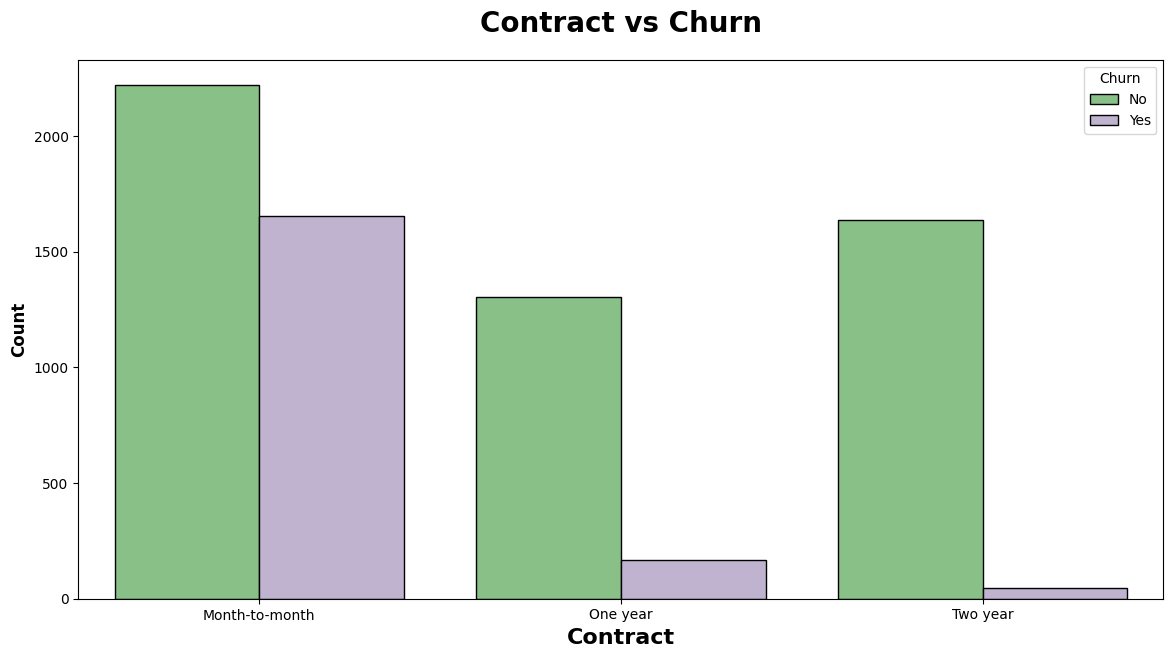

In [ ]:
plt.subplots(figsize=(14,7))
sns.countplot(x="Contract",hue="Churn", data=df, ec = "black",palette="Accent")
plt.title("Contract vs Churn", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Contract", weight="bold", fontsize=16)
plt.legend(title="Churn", fancybox=True)
plt.show()

month to month type contract has the highest churn rate.

The number of churned customers is significantly lower than those who stayed.

Majority of customers on this contract type remain loyal.

In [ ]:
df2 = df.copy()
df2

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,0 - 24 months,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,24 - 36 months,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,0 - 24 months,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,36 - 48 months,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,0 - 24 months,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,No,Yes,Yes,0 - 24 months,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,No,Yes,Yes,> 60 months,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,No,Yes,Yes,0 - 24 months,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,Yes,Yes,No,0 - 24 months,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


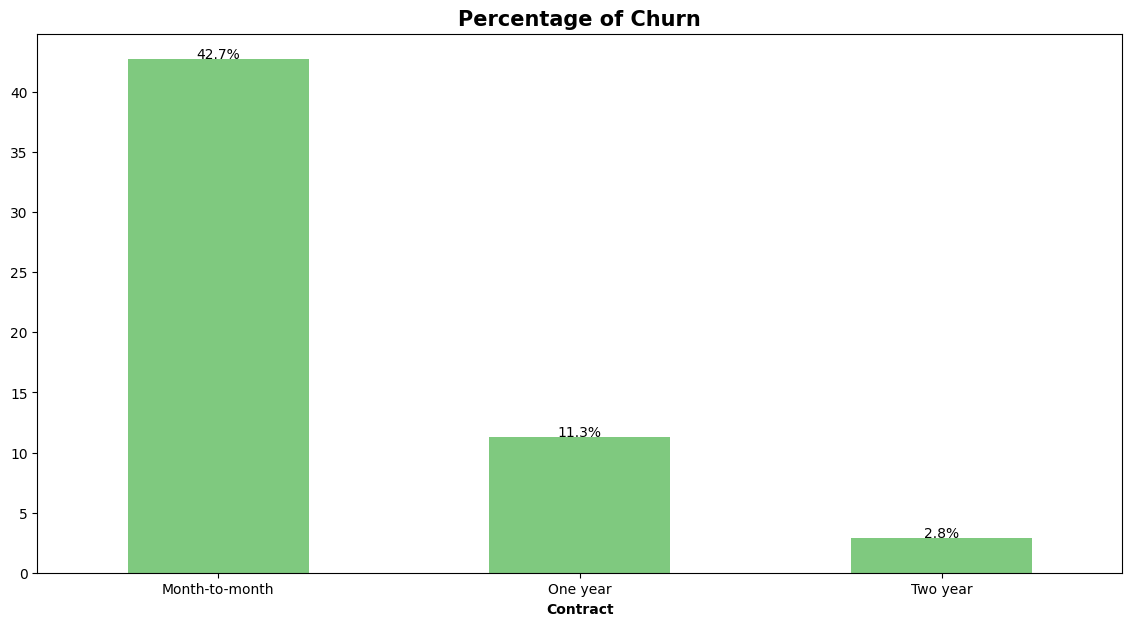

In [110]:
plt.figure(figsize=[14,7])

(100*df2[df2["Churn"].isin(['Yes'])]['Contract'].value_counts()/df2['Contract'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Churn" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["Churn"].isin(['Yes'])]['Contract'].value_counts()/df2['Contract'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('Contract' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

****insights:****

The churn rate decreases dramatically as the contract length increases.

This suggests that contract duration is a major factor in reducing churn.



****4.3:DOES THE TYPE OF Tenure HAVE ANY IMPACT ON CHURN :****


In [112]:
df.groupby('tenure')['Churn'].value_counts(normalize=True).to_frame()*100

proportion
tenure         Churn            
0 - 24 months  No      58.393248
               Yes     41.606752
24 - 36 months No      78.365385
               Yes     21.634615
36 - 48 months No      80.971129
               Yes     19.028871
48 - 60 months No      85.576923
               Yes     14.423077
> 60 months    No      93.390192
               Yes      6.609808

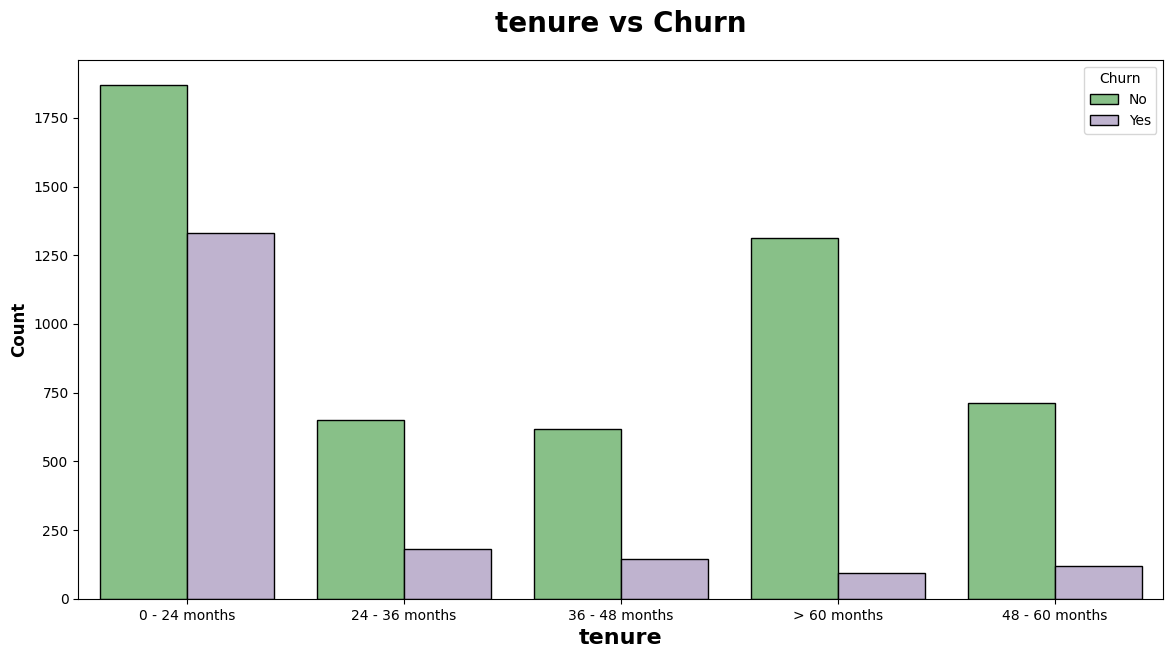

In [111]:
plt.subplots(figsize=(14,7))
sns.countplot(x="tenure",hue="Churn", data=df, ec = "black",palette="Accent")
plt.title("tenure vs Churn", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("tenure", weight="bold", fontsize=16)
plt.legend(title="Churn", fancybox=True)
plt.show()

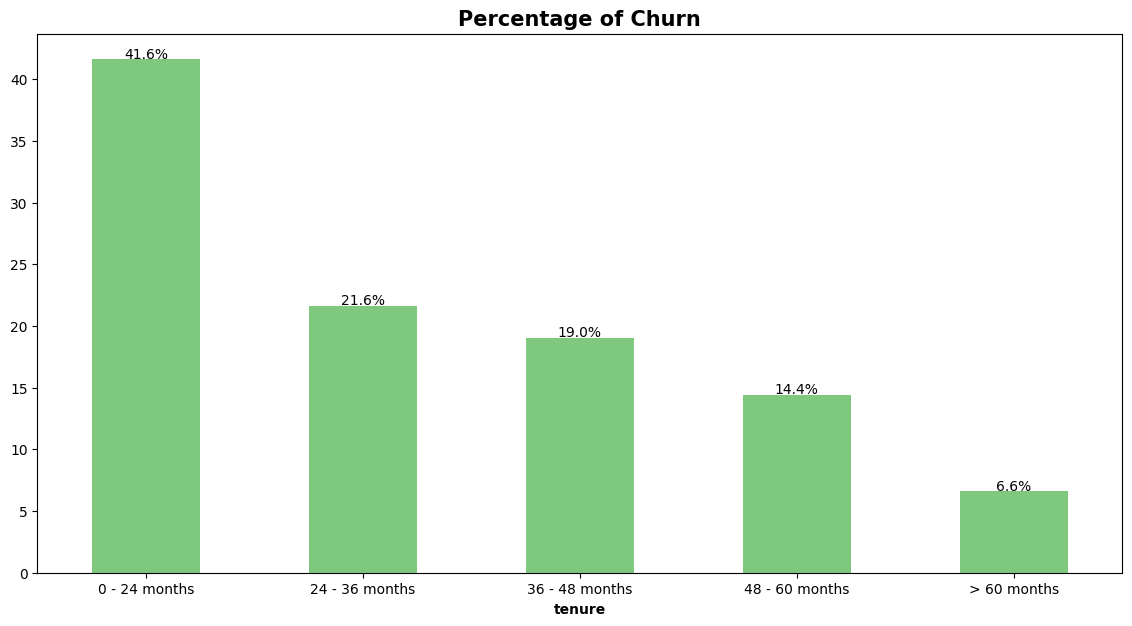

In [113]:
plt.figure(figsize=[14,7])

(100*df2[df2["Churn"].isin(['Yes'])]['tenure'].value_counts()/df2['tenure'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Churn" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["Churn"].isin(['Yes'])]['tenure'].value_counts()/df2['tenure'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('tenure' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

In [114]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,0 - 24 months,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,24 - 36 months,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,0 - 24 months,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,36 - 48 months,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,0 - 24 months,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,No,Yes,Yes,0 - 24 months,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,No,Yes,Yes,> 60 months,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,No,Yes,Yes,0 - 24 months,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,Yes,Yes,No,0 - 24 months,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


****insights:****

The longer a customer stays, the less likely they are to churn.

Most churn happens early, especially in the first two years of service.

****4.4:DOES THE TYPE OF 	PaymentMethod	 HAVE ANY IMPACT ON CHURN :****


In [115]:
df.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).to_frame()*100

proportion
PaymentMethod             Churn            
Bank transfer (automatic) No      83.268482
                          Yes     16.731518
Credit card (automatic)   No      84.746877
                          Yes     15.253123
Electronic check          No      54.714588
                          Yes     45.285412
Mailed check              No      80.798005
                          Yes     19.201995

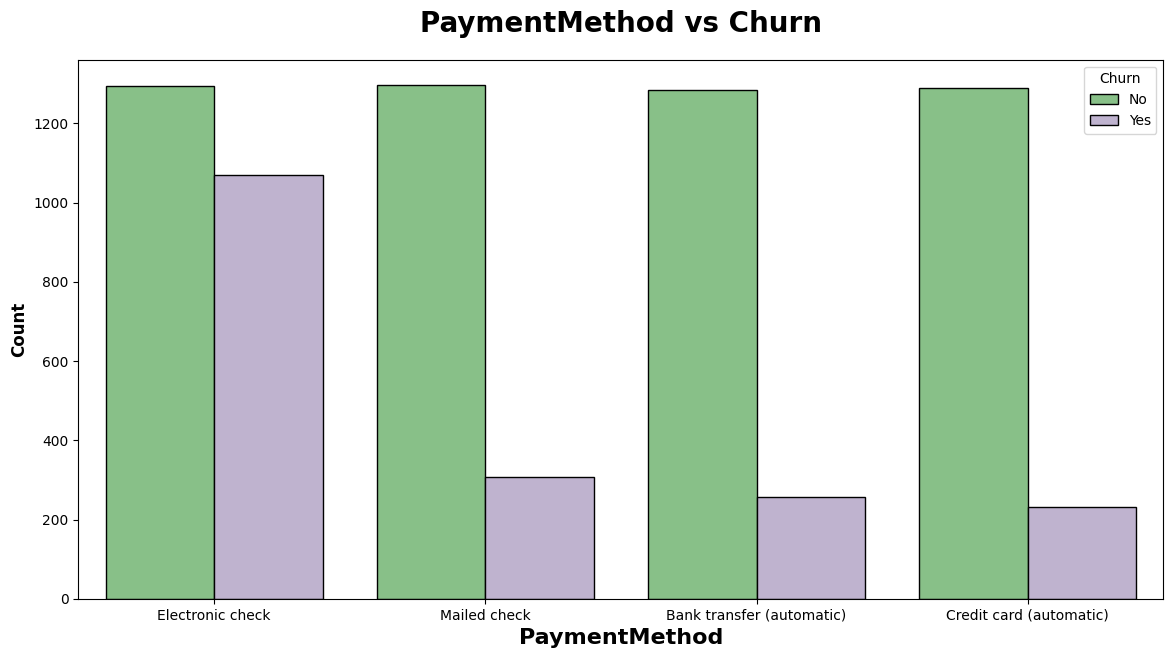

In [116]:
plt.subplots(figsize=(14,7))
sns.countplot(x="PaymentMethod",hue="Churn", data=df, ec = "black",palette="Accent")
plt.title("PaymentMethod vs Churn", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("PaymentMethod", weight="bold", fontsize=16)
plt.legend(title="Churn", fancybox=True)
plt.show()

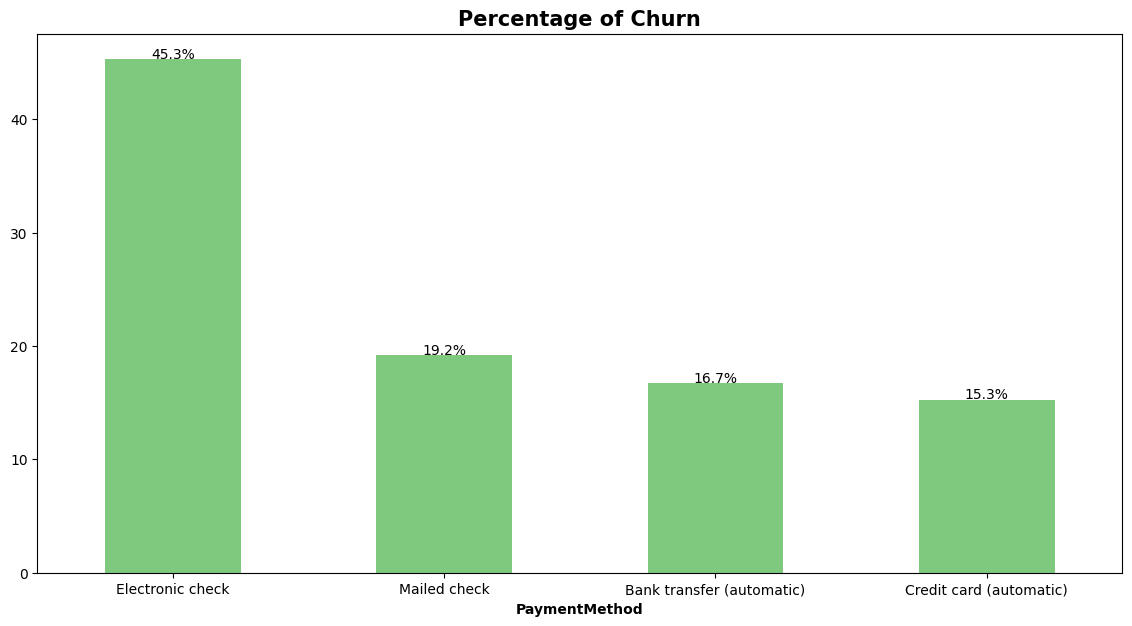

In [120]:
plt.figure(figsize=[14,7])

(100*df2[df2["Churn"].isin(['Yes'])]['PaymentMethod'].value_counts()/df2['PaymentMethod'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Churn" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["Churn"].isin(['Yes'])]['PaymentMethod'].value_counts()/df2['PaymentMethod'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('PaymentMethod' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

****Report:****

Churn is more than 2× higher for customers using manual methods (especially Electronic check).

Automatic payment methods are associated with lower churn ; possibly due to convenience, fewer missed payments, and stronger long-term engagement.

****4.5:DOES THE TYPE OF 	MultipleLines	 HAVE ANY IMPACT ON CHURN :****


In [118]:
df.groupby('MultipleLines')['Churn'].value_counts(normalize=True).to_frame()*100

proportion
MultipleLines Churn            
No            No      74.932349
              Yes     25.067651
Yes           No      71.351534
              Yes     28.648466

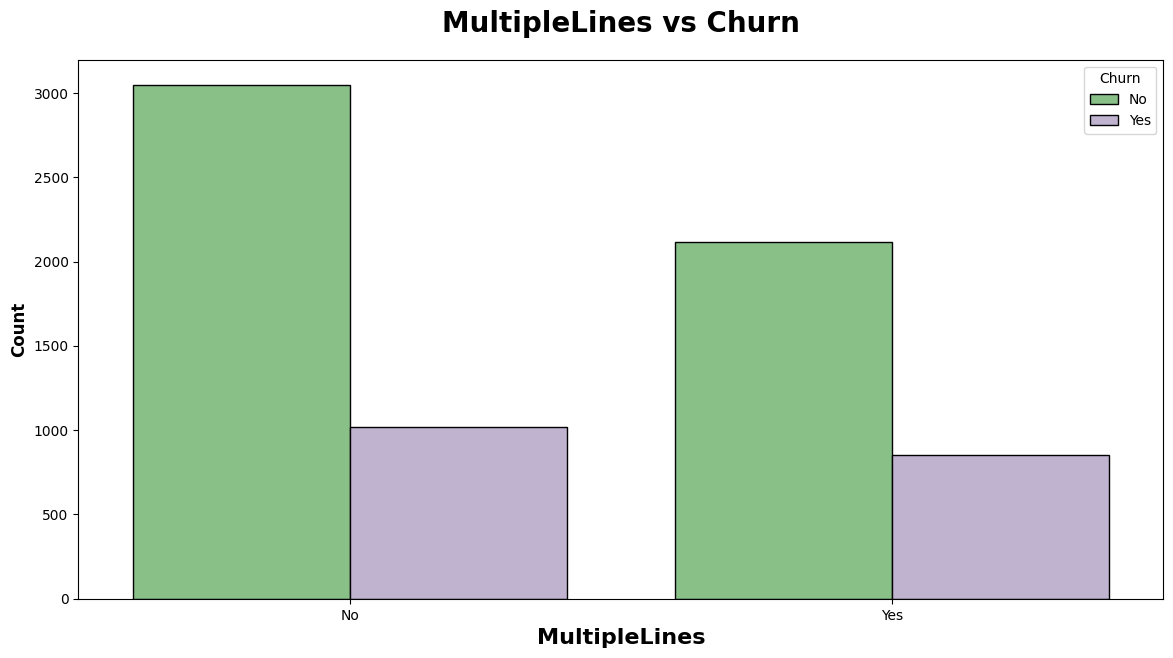

In [119]:
plt.subplots(figsize=(14,7))
sns.countplot(x="MultipleLines",hue="Churn", data=df, ec = "black",palette="Accent")
plt.title("MultipleLines vs Churn", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("MultipleLines", weight="bold", fontsize=16)
plt.legend(title="Churn", fancybox=True)
plt.show()

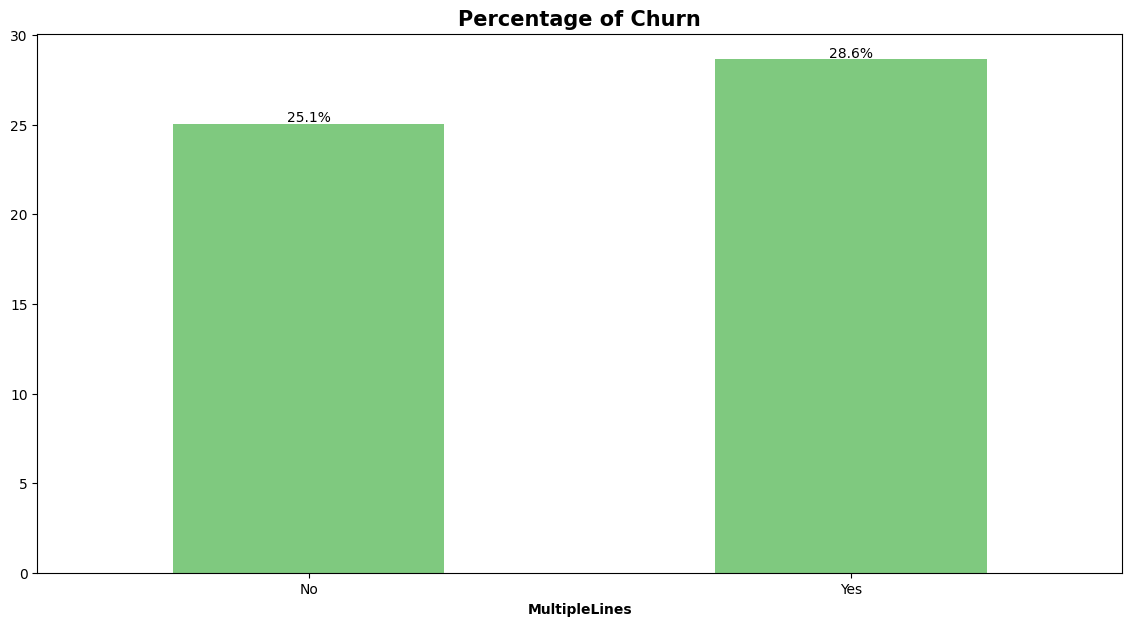

In [121]:
plt.figure(figsize=[14,7])

(100*df2[df2["Churn"].isin(['Yes'])]['MultipleLines'].value_counts()/df2['MultipleLines'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Churn" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["Churn"].isin(['Yes'])]['MultipleLines'].value_counts()/df2['MultipleLines'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('MultipleLines' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

****report:****

More churners are observed among customers with multiple lines compared to those with a single line.

However, both groups have more non-churners than churners.


Customers with multiple lines are modestly more likely to churn.


****4.6:DOES THE TYPE OF 	InternetService	 HAVE ANY IMPACT ON CHURN :****


In [122]:
df.groupby('InternetService')['Churn'].value_counts(normalize=True).to_frame()*100

proportion
InternetService Churn            
DSL             No      81.001656
                Yes     18.998344
Fiber optic     No      58.107235
                Yes     41.892765
No              No      92.565789
                Yes      7.434211

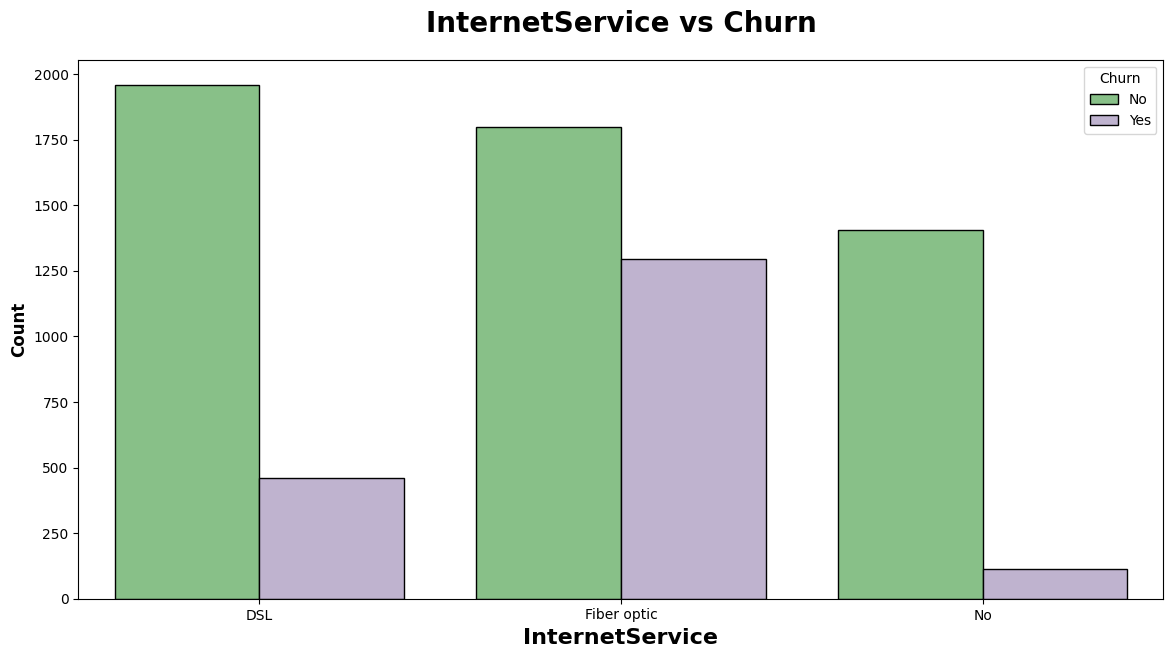

In [123]:
plt.subplots(figsize=(14,7))
sns.countplot(x="InternetService",hue="Churn", data=df, ec = "black",palette="Accent")
plt.title("InternetService vs Churn", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("InternetService", weight="bold", fontsize=16)
plt.legend(title="Churn", fancybox=True)
plt.show()

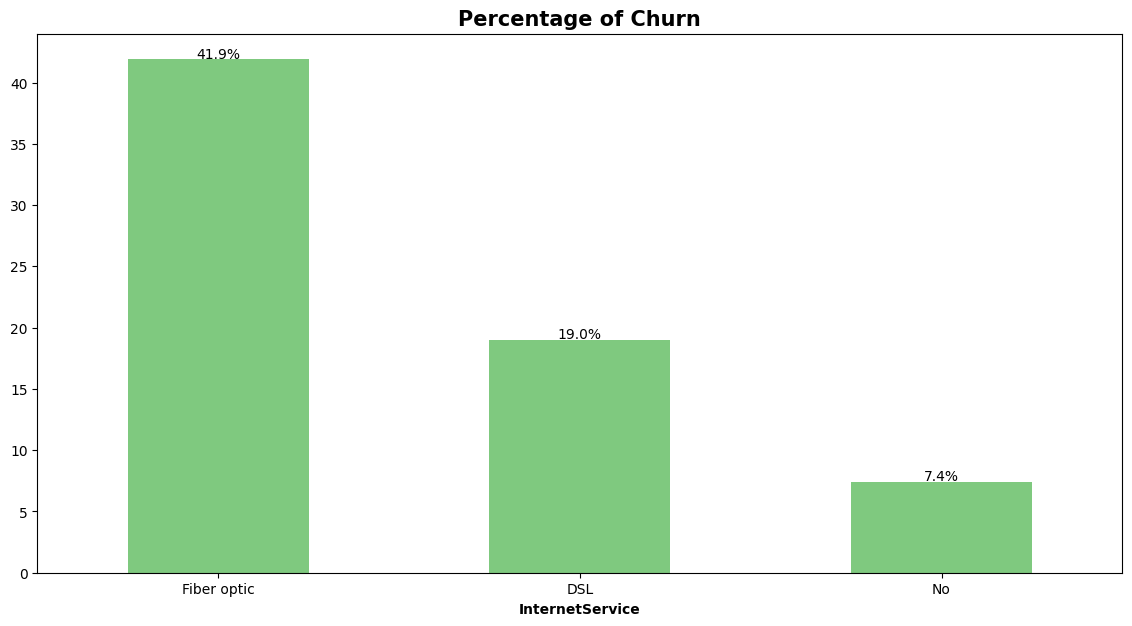

In [124]:
plt.figure(figsize=[14,7])

(100*df2[df2["Churn"].isin(['Yes'])]['InternetService'].value_counts()/df2['InternetService'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Churn" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["Churn"].isin(['Yes'])]['InternetService'].value_counts()/df2['InternetService'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('InternetService' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

 ****report:****

 Fiber optic users are at high risk of churn. It’s important to investigate the reasons

 DSL :Lower churn compared to fiber. DSL customers tend to stay longer.

 Customers without internet service are the least likely to churn.



****4.7:DOES THE TYPE OF 	TechSupport  HAVE ANY IMPACT ON CHURN :****


In [125]:
df.groupby('TechSupport')['Churn'].value_counts(normalize=True).to_frame()*100

proportion
TechSupport Churn            
No          No      68.770032
            Yes     31.229968
Yes         No      84.803922
            Yes     15.196078

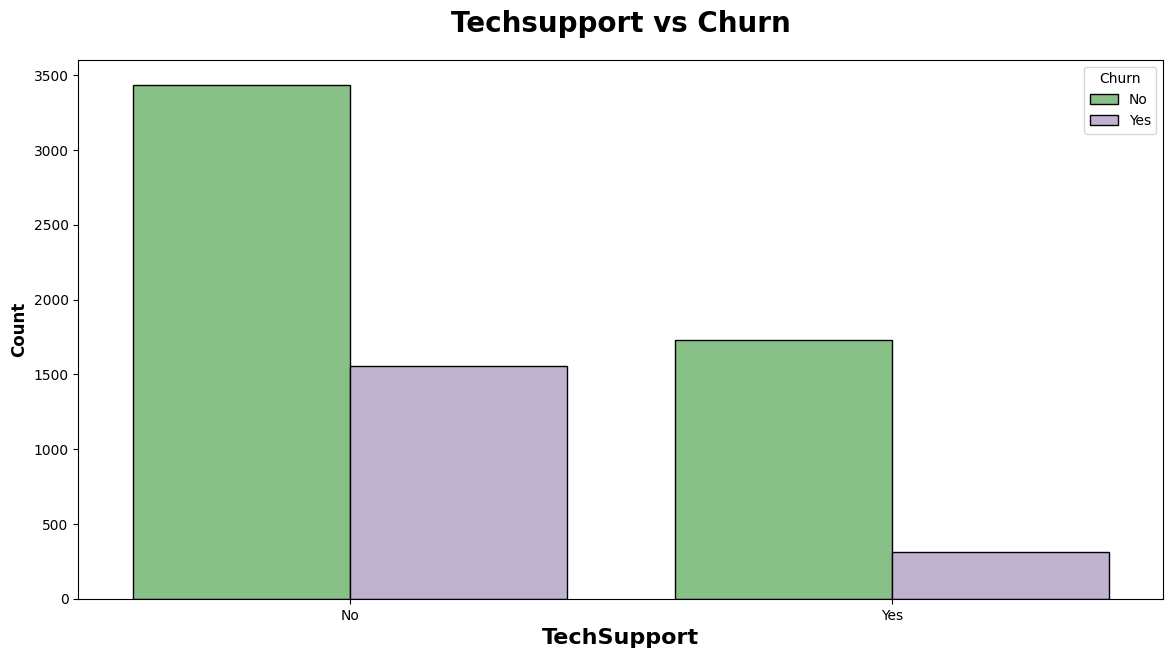

In [126]:
plt.subplots(figsize=(14,7))
sns.countplot(x="TechSupport",hue="Churn", data=df, ec = "black",palette="Accent")
plt.title("Techsupport vs Churn", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("TechSupport", weight="bold", fontsize=16)
plt.legend(title="Churn", fancybox=True)
plt.show()

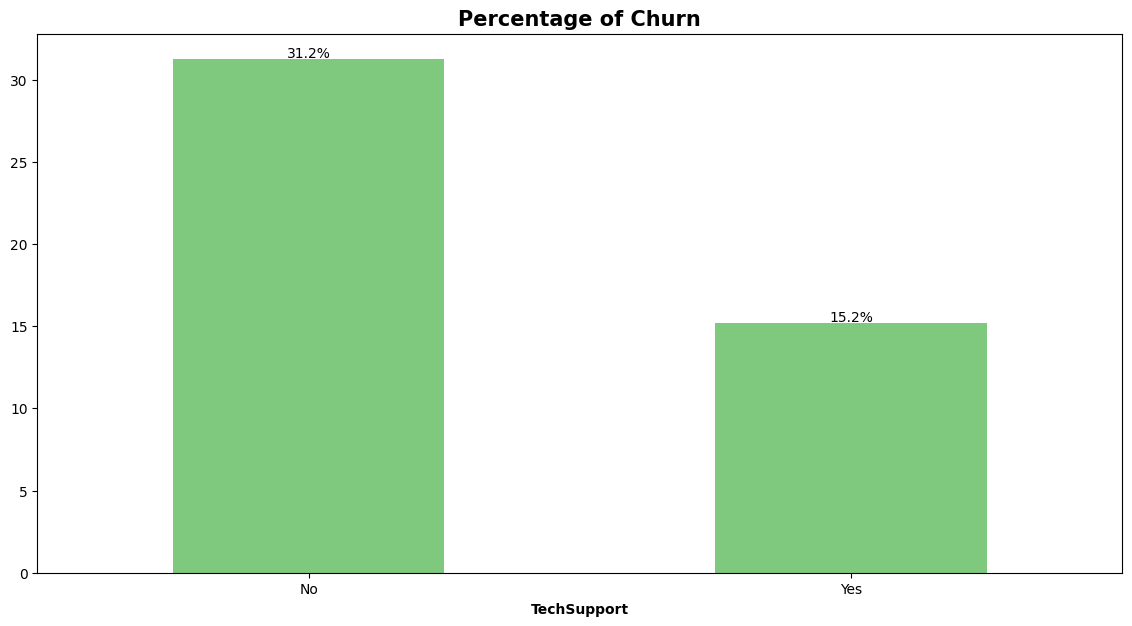

In [127]:
plt.figure(figsize=[14,7])

(100*df2[df2["Churn"].isin(['Yes'])]['TechSupport'].value_counts()/df2['TechSupport'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Churn" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["Churn"].isin(['Yes'])]['TechSupport'].value_counts()/df2['TechSupport'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('TechSupport' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

****report:****

Customers without tech support churn at 31.2%.

Those with tech support churn much less (15.2%).

Indicates that offering technical support can reduce churn significantly.



****4.8:DOES THE TYPE OF 	PhoneService HAVE ANY IMPACT ON CHURN :****


In [131]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'NbrServicesSouscrits'],
      dtype='object')

In [132]:
df.groupby('PhoneService')['Churn'].value_counts(normalize=True).to_frame()*100

proportion
PhoneService Churn            
No           No      75.000000
             Yes     25.000000
Yes          No      73.252519
             Yes     26.747481

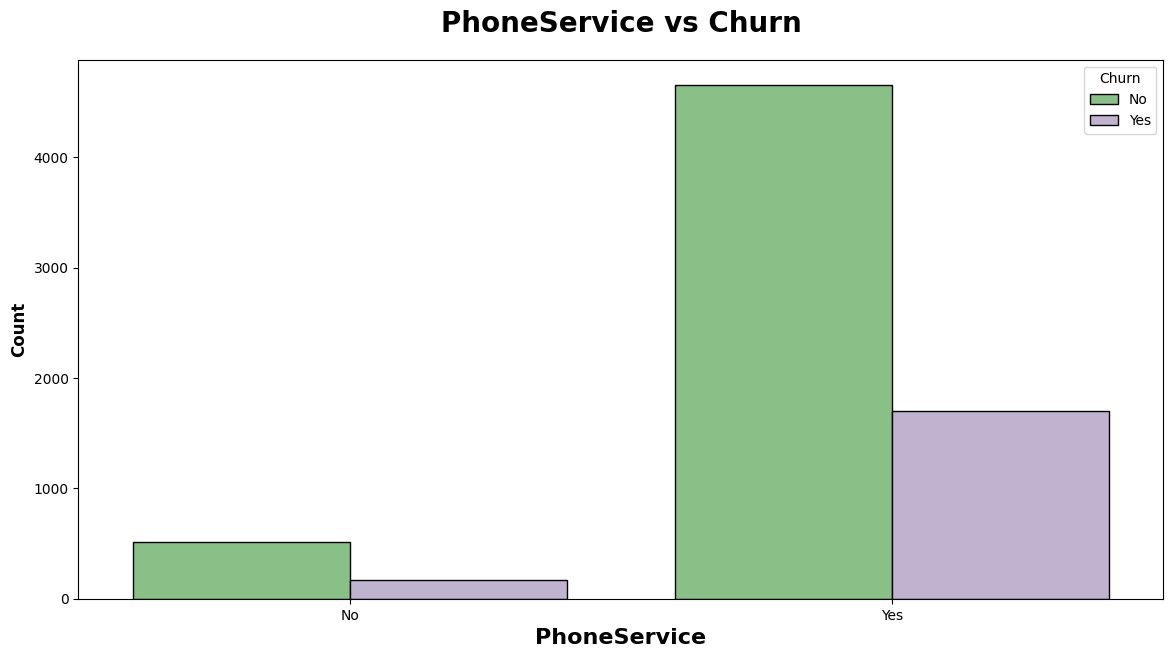

In [133]:
plt.subplots(figsize=(14,7))
sns.countplot(x="PhoneService",hue="Churn", data=df, ec = "black",palette="Accent")
plt.title("PhoneService vs Churn", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("PhoneService", weight="bold", fontsize=16)
plt.legend(title="Churn", fancybox=True)
plt.show()

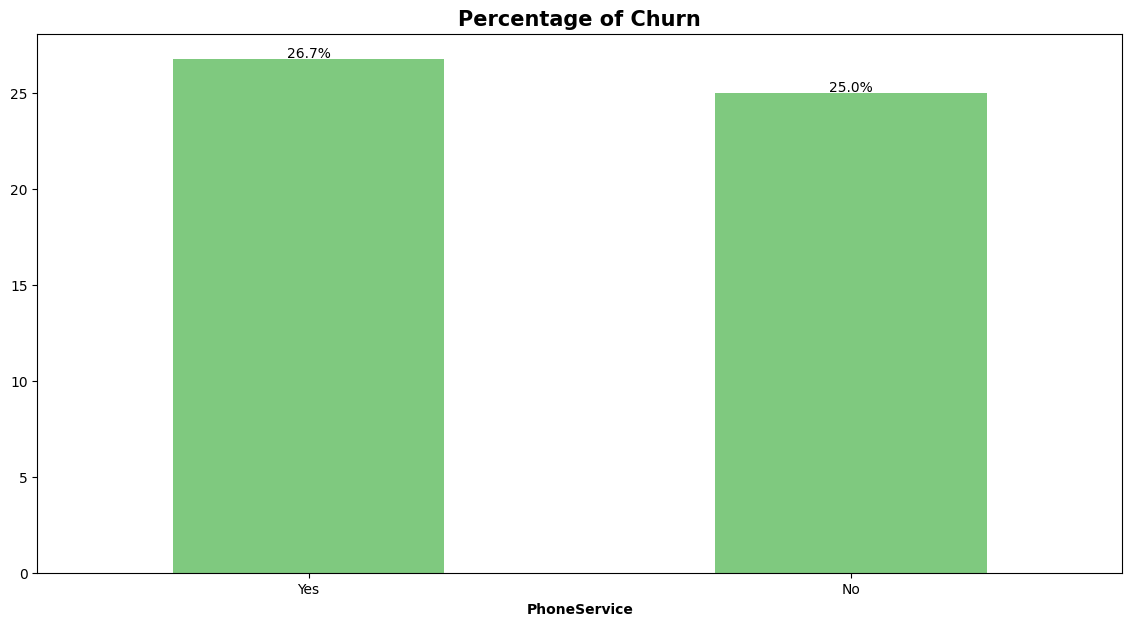

In [134]:
plt.figure(figsize=[14,7])

(100*df2[df2["Churn"].isin(['Yes'])]['PhoneService'].value_counts()/df2['PhoneService'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Churn" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["Churn"].isin(['Yes'])]['PhoneService'].value_counts()/df2['PhoneService'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('PhoneService' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

****report:****

Customers with PhoneService = Yes have a churn rate of 26.7%.

Customers with PhoneService = No have a churn rate of 25.0%.

The difference is very small.

Having a phone service does not significantly affect churn. Both groups have similar churn rates.

****4.9:DOES THE TYPE OF 	OnlineSecurity HAVE ANY IMPACT ON CHURN :****


In [135]:
df.groupby('OnlineSecurity')['Churn'].value_counts(normalize=True).to_frame()*100

proportion
OnlineSecurity Churn            
No             No      68.626669
               Yes     31.373331
Yes            No      85.359801
               Yes     14.640199

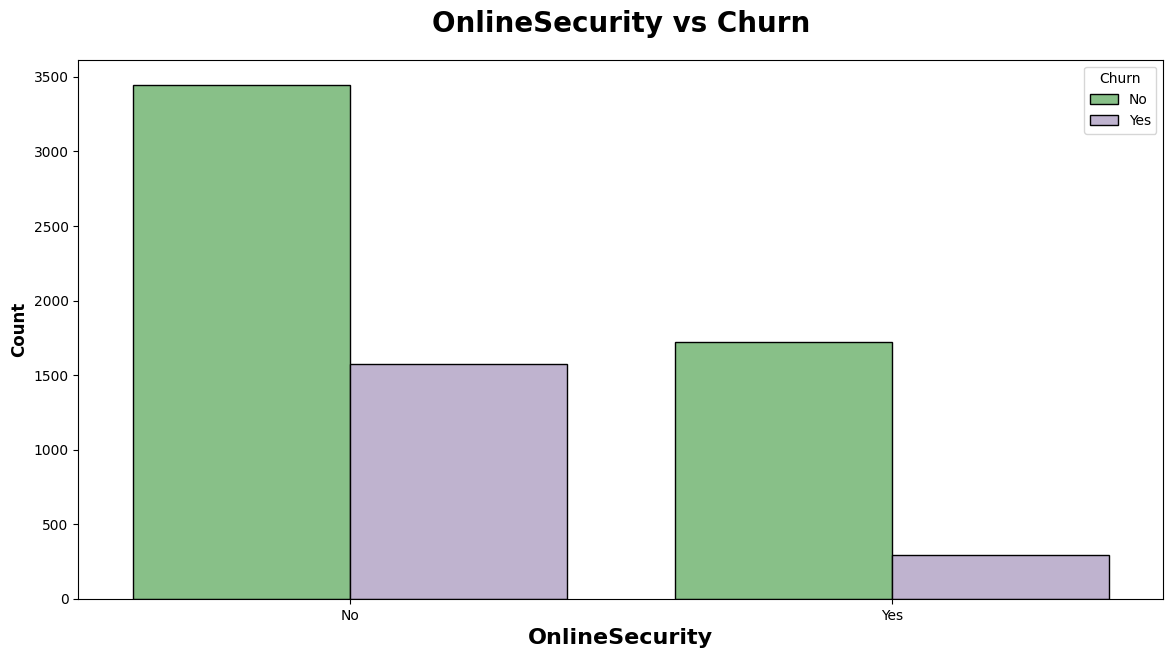

In [136]:
plt.subplots(figsize=(14,7))
sns.countplot(x="OnlineSecurity",hue="Churn", data=df, ec = "black",palette="Accent")
plt.title("OnlineSecurity vs Churn", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("OnlineSecurity", weight="bold", fontsize=16)
plt.legend(title="Churn", fancybox=True)
plt.show()

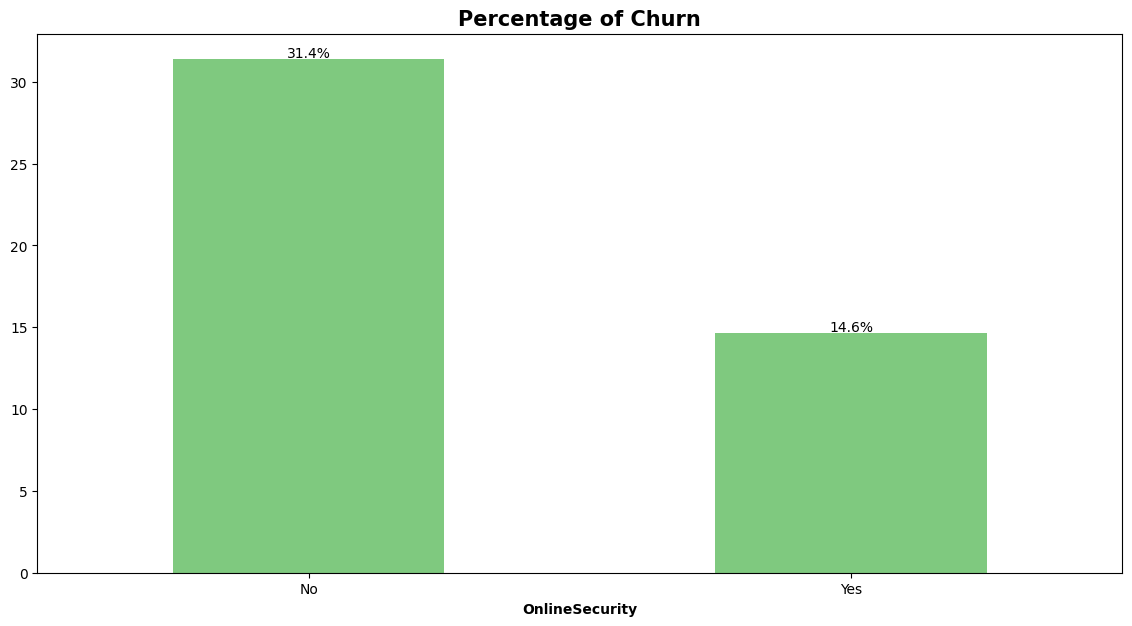

In [137]:
plt.figure(figsize=[14,7])

(100*df2[df2["Churn"].isin(['Yes'])]['OnlineSecurity'].value_counts()/df2['OnlineSecurity'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Churn" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["Churn"].isin(['Yes'])]['OnlineSecurity'].value_counts()/df2['OnlineSecurity'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('OnlineSecurity' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

****report:****

Customers without online security have a churn rate of 31.4%.

Customers with online security have a churn rate of 14.6%

Customers who subscribe to online security are almost 50% less likely to churn compared to those who don’t.

In [139]:
df.groupby('tenure').Churn.value_counts()


tenure          Churn
0 - 24 months   No       1868
                Yes      1331
24 - 36 months  No        652
                Yes       180
36 - 48 months  No        617
                Yes       145
48 - 60 months  No        712
                Yes       120
> 60 months     No       1314
                Yes        93
Name: count, dtype: int64

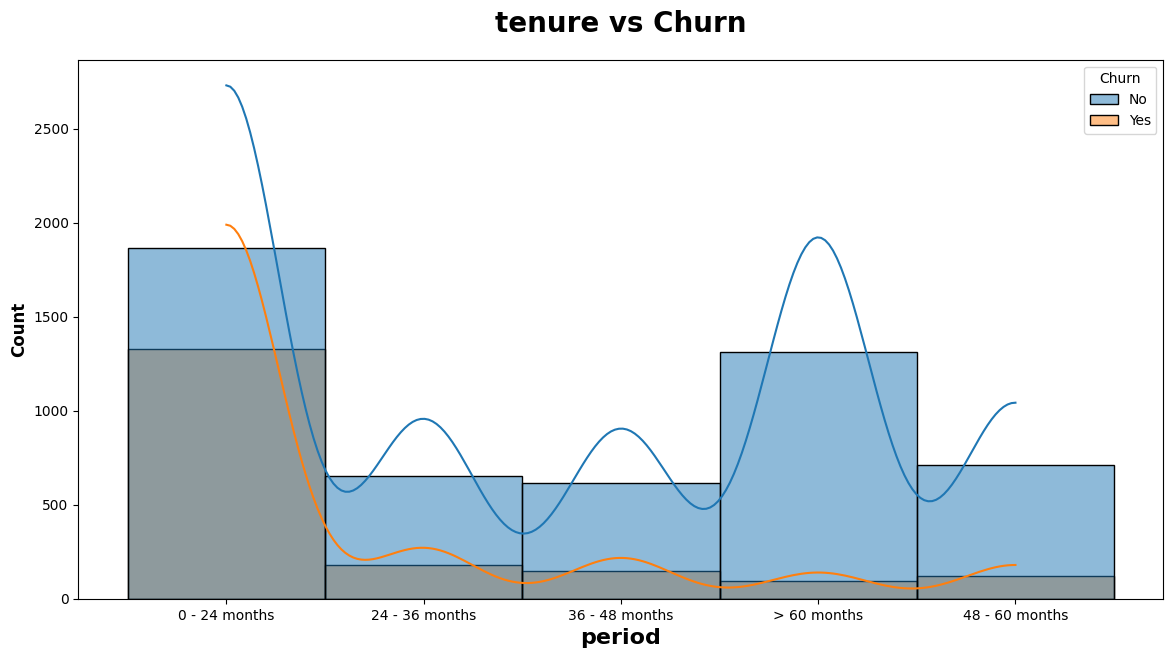

In [140]:
plt.subplots(figsize=(14,7))
sns.histplot(x="tenure",hue="Churn", data=df, kde=True)
plt.title("tenure vs Churn", weight="bold",fontsize=20, pad=20)
plt.xlabel("period", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.show()


****final report:****

we can drop Gender and CustomerID column it doesn't have a real impact 

Most impactful factors that reduce churn:

Having Online Security

Having Tech Support

Choosing DSL over Fiber (or managing expectations/pricing for Fiber)

🧊 Less impactful factors:

Phone service alone doesn’t significantly influence churn.

💡 Strategic Recommendations:

Offer bundled services including online security and tech support.

Investigate why fiber customers are churning (e.g., billing issues, speed problems).

Personalize offers based on tenure or service usage to improve satisfaction.